# Lab Assignment Seven: Sequential Neural Networks
### Authors
- Juliana Antonio
- Xiaona Hang
- Chuanqi Deng
### 1. Preparation


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_json("data/Sarcasm_Headlines_Dataset_v2.json", lines=True)
#remove article_link
data = data.drop(columns=['article_link'])
print("Shape of data:", data.shape)
data.head()

Shape of data: (28619, 2)


,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


<Axes: >

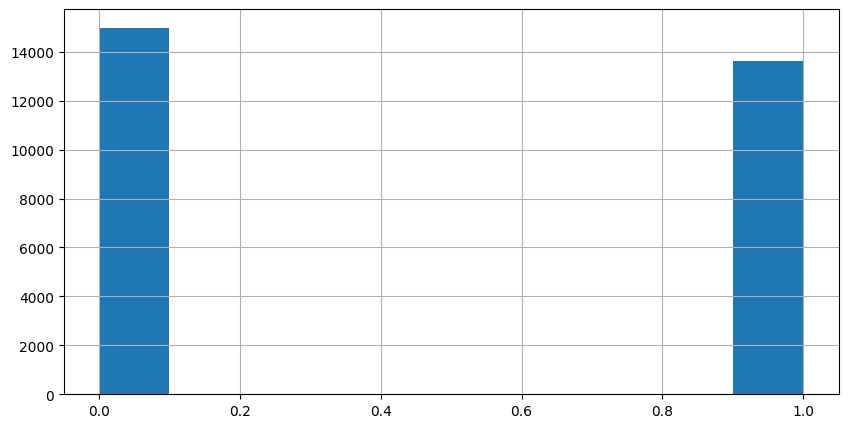

In [2]:
# distribution of sarcasim class
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
data['is_sarcastic'].hist(ax = ax)

In [3]:
data['is_sarcastic'].value_counts()

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64

Since this is already in binary form for classifcation, we see that the distribution is pretty balanced between the sarcastic classifcation (1), which has 14985 instance, and non-sarcastic classifcation (0) which has 13634.

d:\Program\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


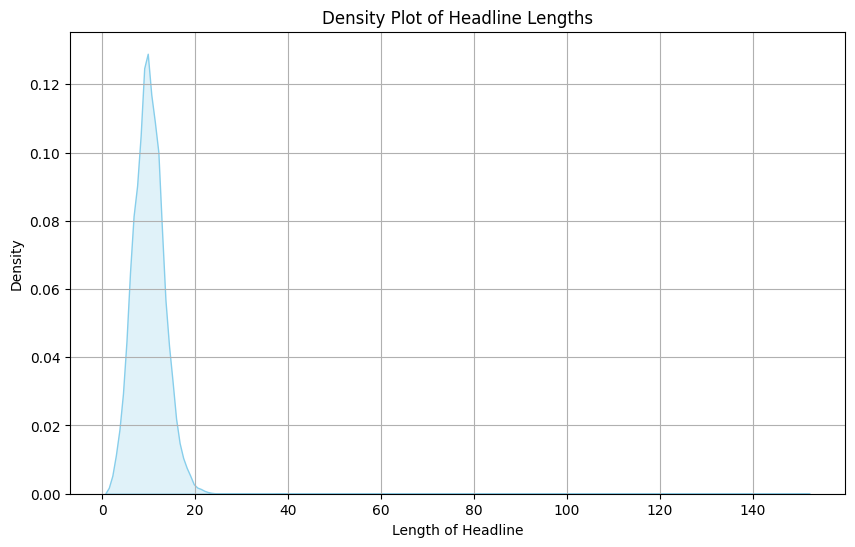

In [42]:
import seaborn as sns

headline_lengths = [len(headline.split()) for headline in data['headline']]

plt.figure(figsize=(10, 6))
sns.kdeplot(headline_lengths, fill=True, color='skyblue')
plt.title('Density Plot of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [5]:
min_length = float('inf')  # Initialize minimum length with infinity
max_length = 0  
total_length = 0  

# Iterate over each headline
for headline in data['headline']:
    headline_length = len(headline)
    
    if headline_length < min_length:
        min_length = headline_length
    if headline_length > max_length:
        max_length = headline_length
    
    total_length += headline_length

total_headlines = len(data)
average_length = total_length / total_headlines

print("Minimum headline length:", min_length)
print("Maximum headline length:", max_length)
print("Average headline length:", average_length)

Minimum headline length: 7
Maximum headline length: 926
Average headline length: 62.30857122890387


Methods of tokenization in the dataset involve converting text data into sequences of integers using Keras' Tokenizer class. However, the decision to force a specific length of sequence is influenced by the distribution of headline lengths. With a maximum headline length of 926 and a minimum length of 7, the average headline length might be biased/skewed. Even when looking at the density plot, which shows that 10 is the most frequent lenght, it is not a good indicator for choosing a max length, as we will lose a lot of information for the larger headlines. We therefore opted to start with a max length of 500 for padding sequences. This choice balances computational efficiency while accommodating the majority of headlines.

In [137]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_TOP_WORDS = 30884 # use entire vocabulary!
MAX_LEN = 100 # maximum and minimum number of words

#tokenize the text
tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(data['headline'])
# save as sequences with integers replacing words
sequences = tokenizer.texts_to_sequences(data['headline'])

# # Convert text data to sequences
# sequences = tokenizer.texts_to_sequences(data['headline'])

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_LEN)

y_bin = data['is_sarcastic']
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y_bin.shape)
print(np.max(X))

Found 30884 unique tokens. Distilled to 30884 top words.
Shape of data tensor: (28619, 100)
Shape of label tensor: (28619,)
30883


The final dataset used for classification includes preprocessed headline text converted into sequences of integers using Keras' Tokenizer, with the binary variable is_sarcastic indicating headline sarcasm. This dataset facilitates the development of a machine learning model to automatically identify and classify sarcastic headlines, offering valuable insights for media analysis and content moderation in online platforms.

### Evaluation Metrics

In evaluating the algorithm's performance for classifying sarcastic headlines, precision and recall metrics will be used. Precision measures the accuracy of positive predictions, ensuring few false positives, while recall measures the completeness of positive predictions, ensuring few false negatives. These metrics are crucial for balancing the costs of misclassifying sarcastic headlines and are directly aligned with the business objective of accurately identifying sarcasm to enhance user experience and platform credibility.

### Training and Testing

We will use shuffle splits to divide the data into training and testing sets. Shuffle splits randomly shuffle the data and then split it into training and testing sets multiple times, reducing bias and variance in model evaluation. This method reflects how an algorithm would be used in practice, as it allows for diverse training and testing data combinations. By randomly shuffling the data, we ensure that the model learns from a representative sample of the data, leading to more robust and generalizable results. Additionally, it provides flexibility in the allocation of data for training and testing, accommodating various scenarios encountered in real-world applications.

In [138]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score, recall_score

num_splits = 4

# Initialize ShuffleSplit object
shuffle_split = ShuffleSplit(n_splits=num_splits, test_size=0.2, random_state=42)

for split, (train_index, test_index) in enumerate(shuffle_split.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]

    print(f"Split {split}: Training set - X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"Split {split}: Testing set - X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Split 1: Training set - X_train shape: (22895, 100), y_train shape: (22895,)
Split 1: Testing set - X_test shape: (5724, 100), y_test shape: (5724,)
Split 2: Training set - X_train shape: (22895, 100), y_train shape: (22895,)
Split 2: Testing set - X_test shape: (5724, 100), y_test shape: (5724,)
Split 3: Training set - X_train shape: (22895, 100), y_train shape: (22895,)
Split 3: Testing set - X_test shape: (5724, 100), y_test shape: (5724,)
Split 4: Training set - X_train shape: (22895, 100), y_train shape: (22895,)
Split 4: Testing set - X_test shape: (5724, 100), y_test shape: (5724,)


### 2. Modeling 
Investigate at least two different sequential network architectures (e.g., a CNN and a Transformer). Alternatively, you may also choose a recurrent network and Transformer network. 
Be sure to use an embedding layer (try to use a pre-trained embedding, if possible). 
Adjust one hyper-parameter of each network to potentially improve generalization performance (train a total of at least four models). 
Visualize the performance of training and validation sets versus the training iterations, showing that the models converged.

#### Transformer

#### 2.1.1 CNN

In [139]:
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Embedding, Input, Concatenate
from tensorflow.keras.layers import Subtract
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.callbacks import EarlyStopping

In [140]:
EMBED_SIZE = 50

sequence_input = Input(shape=(X_train.shape[1],)) # the input is a list of MAX_LEN integers, 500 long

embedded_sequences =  Embedding(top_words, EMBED_SIZE)(sequence_input)

# starting sequence size is 500 (words) by 50 (embedded features)
x = Conv1D(64, 5, activation='relu',
           kernel_initializer='he_uniform')(embedded_sequences)

# pool across time
x = MaxPooling1D(3)(x)
x = Dropout(0.2)(x)

# extract additional features
x = Conv1D(64, 5, activation='relu',
              kernel_initializer='he_uniform')(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.2)(x)

# more features through CNN processing
x = Conv1D(64, 5, activation='relu',
              kernel_initializer='he_uniform')(x)
x = Dropout(0.2)(x)

# Take the average of these elements across features
x_mean = GlobalAveragePooling1D()(x) # average across the 500 features

# Take the variance of these elements across features
x_tmp = Subtract()([x, x_mean]) # subtract the mean
x_std = GlobalAveragePooling1D()(x_tmp**2) # average of the squared differences

# concatenate the two features
x = Concatenate(name='concat_1')([x_mean, x_std])

x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)

preds = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(x)

cnn_model = Model(sequence_input, preds)

print(cnn_model.summary())

# plot_model(
#     cnn_model, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

Model: "functional_56"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_41      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_36        │ (None, 100, 50)   │  1,544,200 │ input_layer_41[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_60 (Conv1D)  │ (None, 96, 64)    │     16,064 │ embedding_36[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_46    │ (None, 32, 64)    │          0 │ conv1d_60[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_101         │ (None, 32, 64)    │          0 │ max_pooling1d_46… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_61 (Conv1D)  │ (None, 28, 64)    │     20,544 │ dropout_101[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_47    │ (None, 9, 64)     │          0 │ conv1d_61[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_102         │ (None, 9, 64)     │          0 │ max_pooling1d_47… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_62 (Conv1D)  │ (None, 5, 64)     │     20,544 │ dropout_102[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_103         │ (None, 5, 64)     │          0 │ conv1d_62[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ dropout_103[0][0] │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_10         │ (None, 5, 64)     │          0 │ dropout_103[0][0… │
│ (Subtract)          │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ power_10 (Power)    │ (None, 5, 64)     │          0 │ subtract_10[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ power_10[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_1            │ (None, 128)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 64)        │      8,256 │ concat_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 1)         │         65 │ dense_66[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,609,673 (6.14 MB)

 Trainable params: 1,609,673 (6.14 MB)

 Non-trainable params: 0 (0.00 B)

None


In [141]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True)
# clipnorm=1.0,

opt = Adam(epsilon=0.0001, learning_rate=lr_schedule)
cnn_model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['precision', 'recall'])

In [ ]:
cnn_list = []
for split, (train_index, test_index) in enumerate(shuffle_split.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]
    
    history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1,
                            validation_data=(X_test, y_test),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

    cnn_list.append(history)

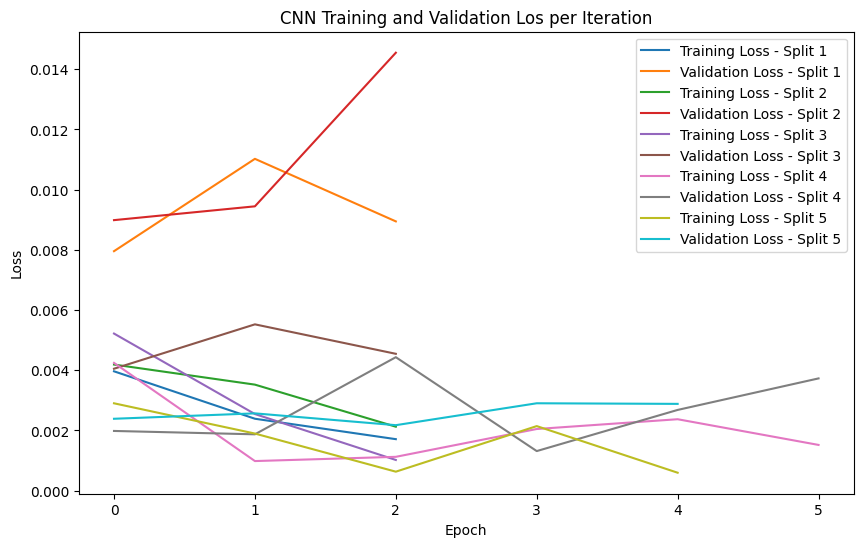

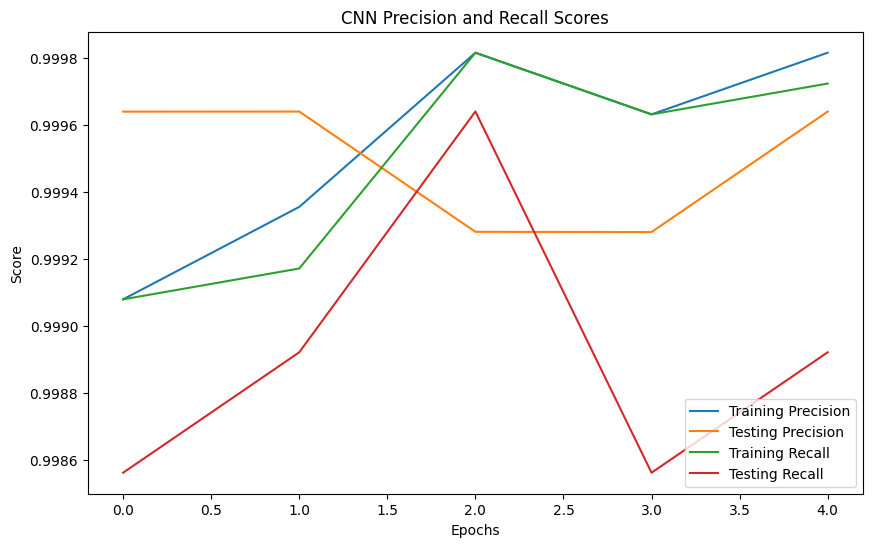

In [30]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(cnn_list):
    plt.plot(history.history['loss'], label=f'Training Loss - Split {i+1}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss - Split {i+1}')

plt.title('CNN Training and Validation Los per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cnn_list[-1].history['precision'], label='Training Precision')
plt.plot(cnn_list[-1].history['val_precision'], label='Testing Precision')
plt.plot(cnn_list[-1].history['recall'], label='Training Recall')
plt.plot(cnn_list[-1].history['val_recall'], label='Testing Recall')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('CNN Precision and Recall Scores')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

#### 2.1.2 Transformer Model


In [143]:
from tensorflow.keras.layers import (
    Dense, Embedding, Dropout, GlobalAveragePooling1D, Input,
    MultiHeadAttention, LayerNormalization, Layer, Concatenate)
from tensorflow.keras.models import Model, Sequential

# The transformer architecture
class TransformerBlock(Layer): # inherit from Keras Layer
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super().__init__()
        # setup the model heads and feedforward network
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        
        # make a two layer network that takes the attention output
        self.ffn = Sequential()
        self.ffn.add(Dense(ff_dim, activation='relu'))
        self.ffn.add(Dense(embed_dim))
        
        # normalize the output  
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)
    
    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        
        # create a residual connection for the attention output
        out1 = self.layernorm1(inputs + attn_output)
        
        # apply dropout if training
        out1 = self.dropout1(out1, training=training)
        
        # place through feed forward after layer norm
        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + ffn_output)
        
        # apply dropout if training
        out2 = self.dropout2(out2, training=training)
        # return the residual from Dense layer
        return out2


class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        # create two embeddings: one for tokens and one for positions
        self.token_emb = Embedding(input_dim=vocab_size,
                                   output_dim=embed_dim)

        self.pos_emb = Embedding(input_dim=maxlen,
                                 output_dim=embed_dim)

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)  
        x = self.token_emb(x)  
        return x + positions  # add embeddngs to get final embedding

In [144]:
embed_dim = EMBED_SIZE # values to use for embedding
num_heads = 2 # number of heads to use in the transformer
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = Input(shape=(X_train.shape[1],))
x = TokenAndPositionEmbedding(X_train.shape[1], top_words, embed_dim)(inputs)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(20, activation='relu')(x)
x = Dropout(0.2)(x)
preds = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(x)

transformer_model = Model(inputs=inputs, outputs=preds)
print(transformer_model.summary())

Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_42 (InputLayer)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ token_and_position_embedding_10 │ (None, 100, 50)        │     1,549,200 │
│ (TokenAndPositionEmbedding)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_11            │ (None, 100, 50)        │        23,832 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_28     │ (None, 50)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,574,073 (6.00 MB)

 Trainable params: 1,574,073 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
transformer_model.compile(loss='binary_crossentropy',
                            optimizer='adam',
                            metrics=['precision', 'recall'])

transformer_list = []
for split, (train_index, test_index) in enumerate(shuffle_split.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]
    
    history = transformer_model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1,
                            validation_data=(X_test, y_test),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

    transformer_list.append(history)

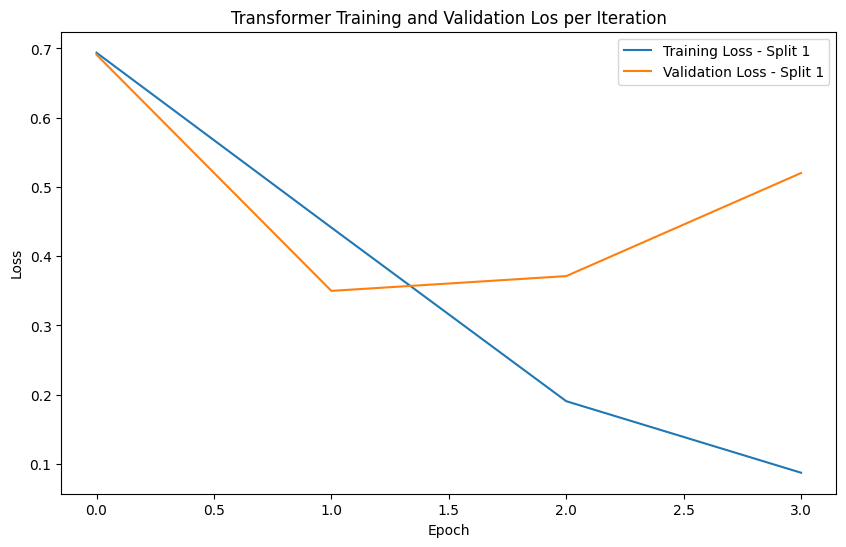

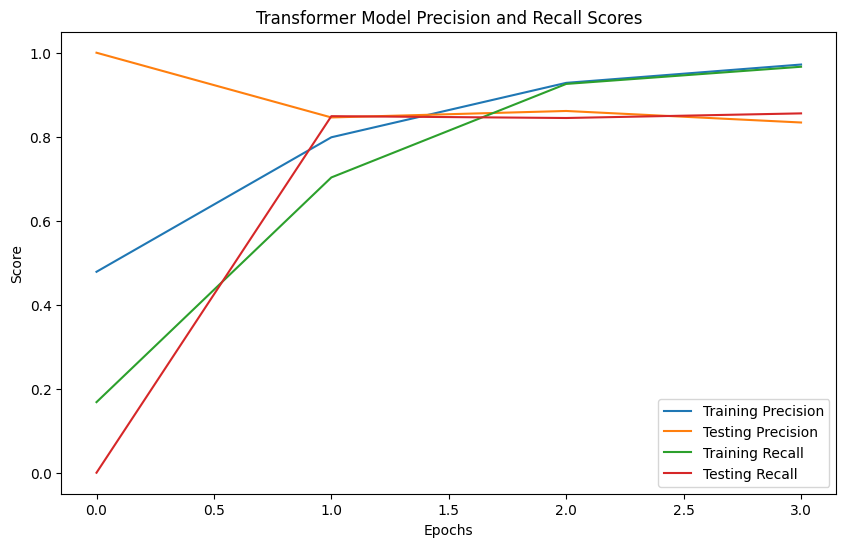

In [146]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(transformer_list):
    plt.plot(history.history['loss'], label=f'Training Loss - Split {i+1}')
    plt.plot(history.history['val_loss'],
             label=f'Validation Loss - Split {i+1}')

plt.title('Transformer Training and Validation Los per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(transformer_list[-1].history['precision'], label='Training Precision')
plt.plot(transformer_list[-1].history['val_precision'], label='Testing Precision')
plt.plot(transformer_list[-1].history['recall'], label='Training Recall')
plt.plot(transformer_list[-1].history['val_recall'], label='Testing Recall')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Transformer Model Precision and Recall Scores')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

#### 2.1.3 CNN with pre-trained GloVe embedding in Keras
A version of the GlovVe pretrained embedding matrix used in the following CNN model.
Data is downloaded here:
http://nlp.stanford.edu/data/glove.6B.zip

In [147]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Layer, Embedding, GlobalAveragePooling1D, Dropout, Dense


EMBED_SIZE = 100  # same size as the GloVe embeddings
word_index = tokenizer.word_index
embeddings_index = {}

# save key/array pairs of the embeddings
# the key of the dictionary is the word, the array is the embedding

with open('data/glovedata/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


print('Found %s word vectors.' % len(embeddings_index))

# fill in the matrix with the embeddings, using the ordering from keras word tokenizer
# Create the embedding matrix
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words += 1

print(f"Found embeddings for {found_words} words.\n"
      f"Embedding Matrix Shape: {embedding_matrix.shape}\n"
      f"Percentage:: {100 * found_words / embedding_matrix.shape[0]}")

Found 400000 word vectors.
Found embeddings for 24737 words.
Embedding Matrix Shape: (30885, 100)
Percentage:: 80.09389671361502


In [148]:
print(len(word_index) + 1)
print(type(embedding_matrix))

30885
<class 'numpy.ndarray'>


In [149]:
from tensorflow.keras.layers import Embedding

embedding_layer =  Embedding(len(word_index) + 1,
                    EMBED_SIZE,
                    weights=[embedding_matrix],
                    # input_length=MAX_LEN,
                    trainable=False)


In [137]:
## Test the Emabedding layer
# from tensorflow.keras.layers import Embedding
# import numpy as np

# test_embedding_layer = Embedding(
#     30885, 100, weights=[embedding_matrix], input_length=500, trainable=False)

# # Create a test input (e.g., a single sample with a sequence of 500 indices)
# test_input = np.random.randint(0, 30885, size=(1, 500))

# # Get output from the embedding layer
# test_output = test_embedding_layer(test_input)
# print(test_output.shape)  # Should output (1, 500, 100)

In [151]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Embedding
EMBED_SIZE = 100  # same size as loaded from GLOVE'
sequence_input = Input(shape=(MAX_LEN,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(64, 5, activation='relu',
           kernel_initializer='he_uniform')(embedded_sequences)

x = MaxPooling1D(3)(x) 
x = Dropout(0.2)(x)
x = Conv1D(64, 5, activation='relu',
           kernel_initializer='he_uniform')(x)

x = MaxPooling1D(3)(x) 
x = Dropout(0.2)(x)
x = Conv1D(64, 5, activation='relu',
           kernel_initializer='he_uniform')(x)

x = MaxPooling1D(3)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu',
          kernel_initializer='he_uniform')(x)
preds = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(x)

cnn_glove_model = Model(sequence_input, preds)

print(cnn_glove_model.summary())


Model: "functional_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_45 (InputLayer)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_39 (Embedding)        │ (None, 100, 100)       │     3,088,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_66 (Conv1D)              │ (None, 96, 64)         │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_50 (MaxPooling1D) │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_67 (Conv1D)              │ (None, 28, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_51 (MaxPooling1D) │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_68 (Conv1D)              │ (None, 5, 64)          │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_52 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,165,877 (12.08 MB)

 Trainable params: 77,377 (302.25 KB)

 Non-trainable params: 3,088,500 (11.78 MB)

None


In [152]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True)
# clipnorm=1.0,

opt = Adam(epsilon=0.0001, learning_rate=lr_schedule)
cnn_glove_model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['precision', 'recall'])

In [153]:
cnn_glove_list = []
for split, (train_index, test_index) in enumerate(shuffle_split.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]
    
    history = cnn_glove_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1,
                            validation_data=(X_test, y_test),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

    cnn_glove_list.append(history)

Epoch 1/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.6924 - precision: 0.4796 - recall: 0.1029 - val_loss: 0.6917 - val_precision: 1.0000 - val_recall: 0.0037
Epoch 2/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6919 - precision: 0.7647 - recall: 0.0036 - val_loss: 0.6915 - val_precision: 1.0000 - val_recall: 0.0037
Epoch 3/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6919 - precision: 0.8556 - recall: 0.0040 - val_loss: 0.6914 - val_precision: 1.0000 - val_recall: 0.0033
Epoch 4/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6913 - precision: 0.6943 - recall: 0.0041 - val_loss: 0.6921 - val_precision: 1.0000 - val_recall: 0.0018
Epoch 5/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6909 - precision: 0.9459 - recall: 0.0044 - val_loss: 0.6915 - val_precision: 1.0000 - val_recall: 0.0029
Epoch 1/10
358/358 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6914 - precision: 0.5224 - recall: 0.0328 - val_loss: 0.6931 - val_precision: 0.7778 - val_recall:

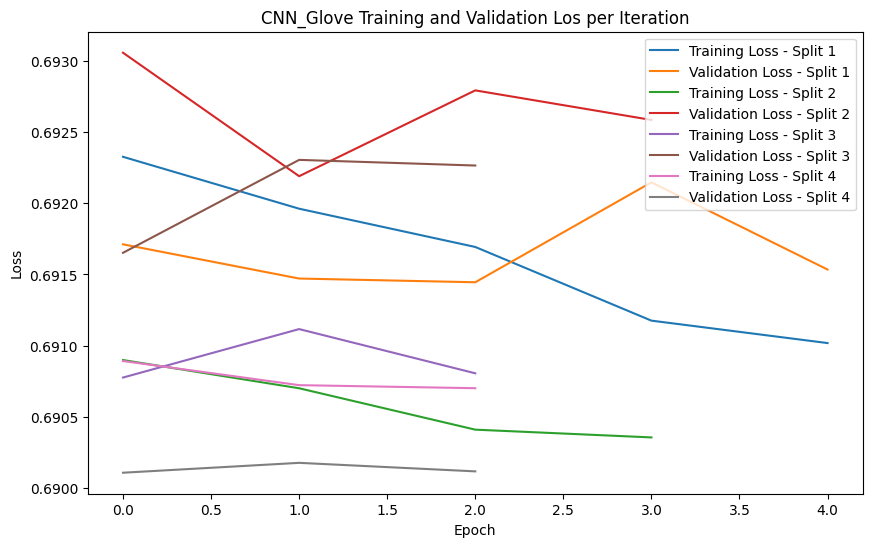

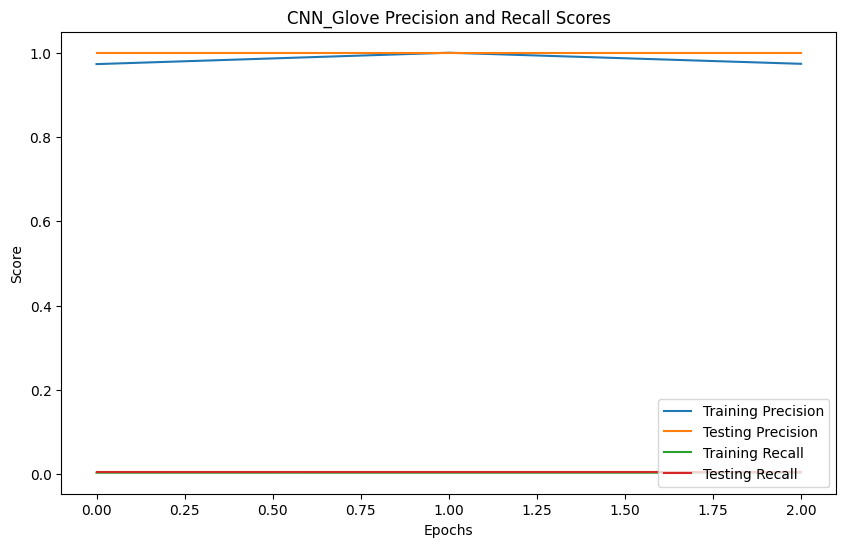

In [154]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(cnn_glove_list):
    plt.plot(history.history['loss'], label=f'Training Loss - Split {i+1}')
    plt.plot(history.history['val_loss'],
             label=f'Validation Loss - Split {i+1}')

plt.title('CNN_Glove Training and Validation Los per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cnn_glove_list[-1].history['precision'], label='Training Precision')
plt.plot(cnn_glove_list[-1].history['val_precision'], label='Testing Precision')
plt.plot(cnn_glove_list[-1].history['recall'], label='Training Recall')
plt.plot(cnn_glove_list[-1].history['val_recall'], label='Testing Recall')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('CNN_Glove Precision and Recall Scores')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

#### 2.2.4 Transformer Model with More Layers
Note: the pretrained embedding matrix is not used here.

In [156]:
EMBED_SIZE = 50
num_heads = 4
ff_dim = 32 
inputs = Input(shape=(X_train.shape[1],))
x = TokenAndPositionEmbedding(X_train.shape[1], top_words, embed_dim)(inputs)
x = TransformerBlock(EMBED_SIZE, num_heads, ff_dim)(x)
x = TransformerBlock(EMBED_SIZE, num_heads, ff_dim)(x)

x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(20, activation='relu')(x)
x = Dropout(0.2)(x)
preds = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(x)

transformer_2 = Model(inputs=inputs, outputs=preds)
print(transformer_2.summary())

Model: "functional_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_49 (InputLayer)     │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ token_and_position_embedding_12 │ (None, 100, 50)        │     1,549,200 │
│ (TokenAndPositionEmbedding)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_14            │ (None, 100, 50)        │        44,132 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_15            │ (None, 100, 50)        │        44,132 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_30     │ (None, 50)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_128 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_129 (Dropout)           │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,638,505 (6.25 MB)

 Trainable params: 1,638,505 (6.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [157]:
transformer_2.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['precision', 'recall'])

In [158]:
transformer_2_list = []
for split, (train_index, test_index) in enumerate(shuffle_split.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]
    
    history = transformer_2.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1,
                            validation_data=(X_test, y_test),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

    transformer_2_list.append(history)

Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - loss: 0.6980 - precision: 0.4653 - recall: 0.1728 - val_loss: 0.6869 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 0.5568 - precision: 0.7282 - recall: 0.5397 - val_loss: 0.3530 - val_precision: 0.8417 - val_recall: 0.8336
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 0.2456 - precision: 0.9085 - recall: 0.8972 - val_loss: 0.3403 - val_precision: 0.8832 - val_recall: 0.8091
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - loss: 0.1068 - precision: 0.9661 - recall: 0.9587 - val_loss: 0.4422 - val_precision: 0.8451 - val_recall: 0.8457
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - loss: 0.0511 - precision: 0.9867 - recall: 0.9813 - val_loss: 0.7105 - val_precision: 0.8635 - val_recall: 0.7878
Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.1287 - precision: 0.9581 - recall: 0.9590 - val_loss: 0.1587 - val_precision: 0.9779

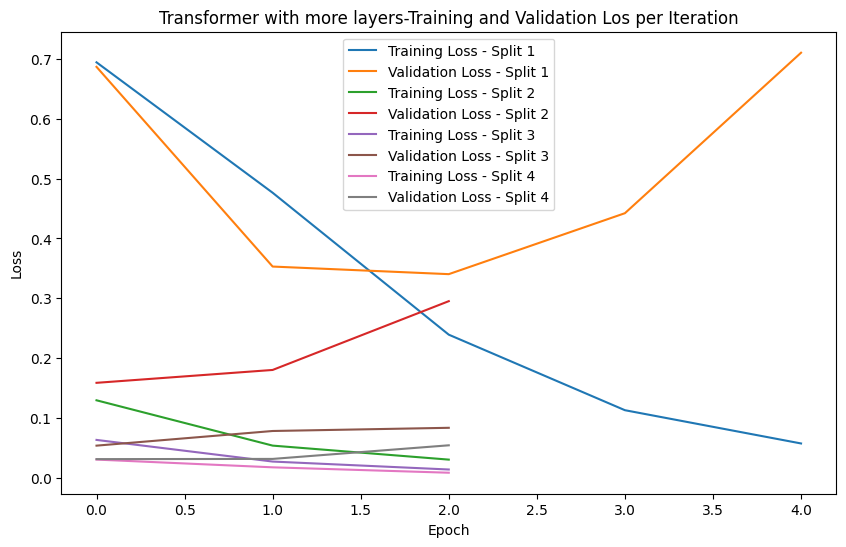

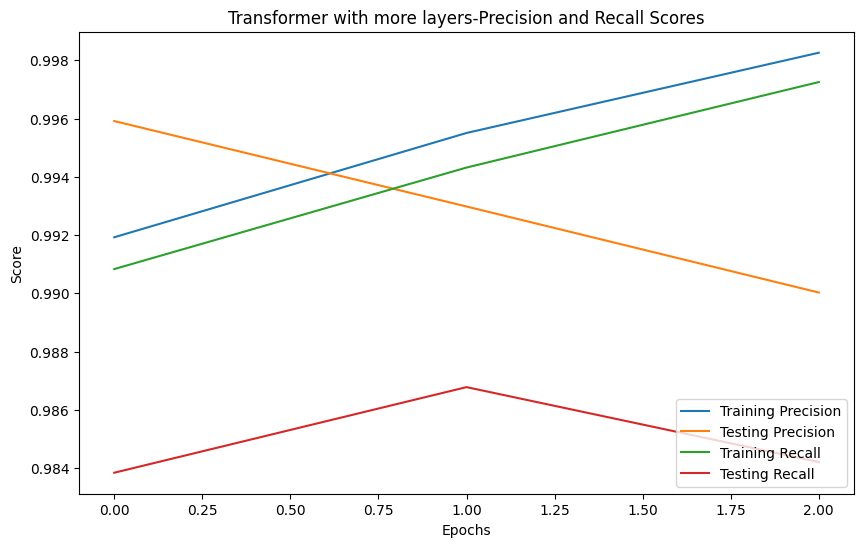

In [159]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(transformer_2_list):
    plt.plot(history.history['loss'], label=f'Training Loss - Split {i+1}')
    plt.plot(history.history['val_loss'],
             label=f'Validation Loss - Split {i+1}')

plt.title('Transformer with more layers-Training and Validation Los per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(transformer_2_list[-1].history['precision'], label='Training Precision')
plt.plot(transformer_2_list[-1].history['val_precision'],label='Testing Precision')
plt.plot(transformer_2_list[-1].history['recall'], label='Training Recall')
plt.plot(transformer_2_list[-1].history['val_recall'], label='Testing Recall')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Transformer with more layers-Precision and Recall Scores')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
plt.show()

#### 2.3 Visualization and Comparison

##### 2.3.1 Visualization

In [251]:
from collections import OrderedDict

models = OrderedDict({"CNN": cnn_model, "Transformer": transformer_model, "CNN_GLOVE":cnn_glove_model, "Transformer2":transformer_2})
results = [[] for _ in range(len(models))]
for split, (train_index, test_index) in enumerate(shuffle_split.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]
    
    for idx, (model_name, model) in enumerate(models.items()):
        model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1,
                                callbacks=[EarlyStopping(monitor='loss', patience=2)])
        res = model.evaluate(X_test, y_test, batch_size=64)
        results[idx].append(res)

Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0121 - precision: 0.9976 - recall: 0.9878
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0102 - precision: 0.9995 - recall: 0.9890
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0114 - precision: 0.9982 - recall: 0.9887
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0111 - precision: 0.9989 - recall: 0.9868
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0128 - precision: 0.9987 - recall: 0.9868
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0615 - precision: 0.9944 - recall: 0.9850
Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0036 - precision: 0.9992 - recall: 0.9992
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0025 - precision: 0.9992 - recall: 0.9994
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 1.7480e-04 - precision: 0.9999 - recall: 0.9999
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 3.5250e-04 - prec

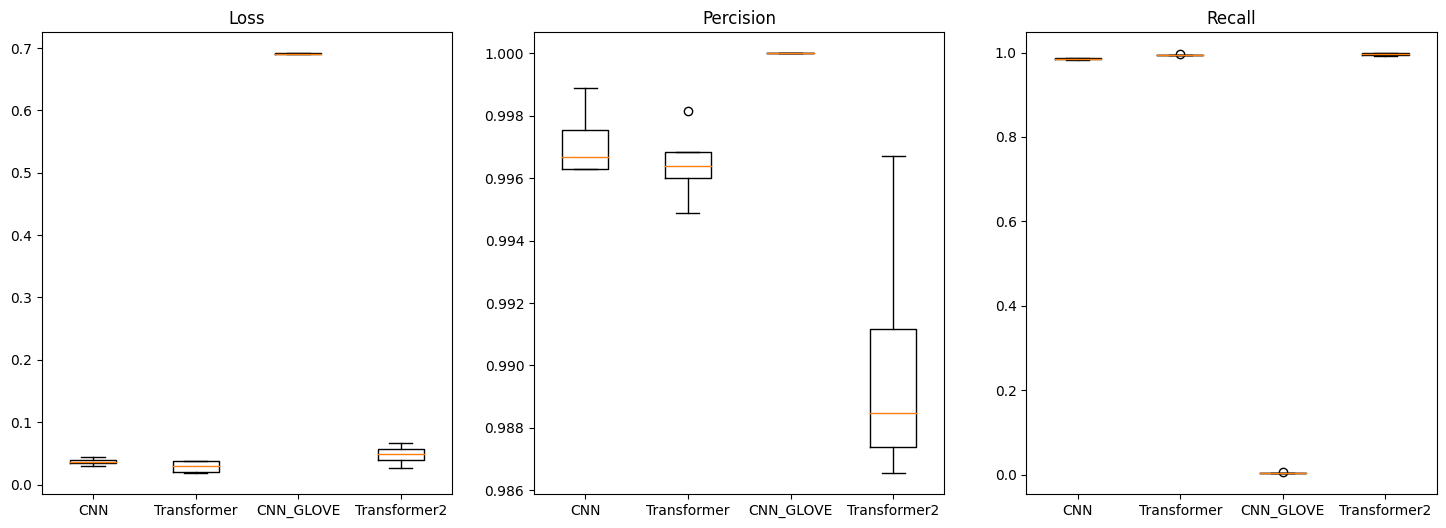

In [269]:
results = np.array(results).transpose((1,0,2))
plt.figure(figsize=(18, 6))

for i, title in enumerate(['Loss', 'Percision', 'Recall']):
    ax = plt.subplot(1, 3, i+1)
    ax.set_title(title)
    ax.boxplot(results[:, :, i], labels=models.keys())

plt.show()

##### 2.3.2 Comparison

In [267]:
metrics_df = pd.DataFrame(results.reshape((-1, 3)), index=list(models.keys()) * num_splits, columns=["loss", "precision", "recall"])
metrics_df = metrics_df.reset_index().rename(columns={'index':'Model'})
metrics_df

,Model,loss,precision,recall
0,CNN,0.044628,0.996287,0.983144
1,Transformer,0.037388,0.994870,0.994870
2,CNN_GLOVE,0.690784,1.000000,0.003664
3,Transformer2,0.042734,0.986545,0.994137
4,CNN,0.036815,0.998897,0.984415
5,Transformer,0.036964,0.996368,0.994201
6,CNN_GLOVE,0.691472,1.000000,0.002900
7,Transformer2,0.026666,0.996725,0.992751
8,CNN,0.030126,0.997094,0.986700
9,Transformer,0.021116,0.996405,0.996405


In [266]:
# display the evaluation results
from IPython.display import display
grouped_metrics_df_mean = metrics_df.groupby('Model').mean().reset_index()
grouped_metrics_df_median = metrics_df.groupby('Model').median().reset_index()
grouped_metrics_df_min =  metrics_df.groupby('Model').min().reset_index()
grouped_metrics_df_max =  metrics_df.groupby('Model').max().reset_index()

print(f"Mean {num_splits}-fold cross validation result")
display(grouped_metrics_df_mean)

print(f"Median {num_splits}-fold cross validation result")
display(grouped_metrics_df_median)

print(f"Min {num_splits}-fold cross validation result")
display(grouped_metrics_df_min)

print(f"Max {num_splits}-fold cross validation result")
display(grouped_metrics_df_max)

Mean 4-fold cross validation result


,Model,loss,precision,recall
0,CNN,0.036853,0.997142,0.985077
1,CNN_GLOVE,0.690919,1.000000,0.003824
2,Transformer,0.028407,0.996450,0.995084
3,Transformer2,0.047376,0.990057,0.995724


Median 4-fold cross validation result


,Model,loss,precision,recall
0,CNN,0.036329,0.996692,0.985232
1,CNN_GLOVE,0.691072,1.000000,0.003629
2,Transformer,0.029040,0.996387,0.994865
3,Transformer2,0.048288,0.988479,0.995990


Min 4-fold cross validation result


,Model,loss,precision,recall
0,CNN,0.030126,0.996287,0.983144
1,CNN_GLOVE,0.690061,1.000000,0.002900
2,Transformer,0.018161,0.994870,0.994201
3,Transformer2,0.026666,0.986545,0.992751


Max 4-fold cross validation result


,Model,loss,precision,recall
0,CNN,0.044628,0.998897,0.986700
1,CNN_GLOVE,0.691472,1.000000,0.005140
2,Transformer,0.037388,0.998158,0.996405
3,Transformer2,0.066263,0.996725,0.998164


### 3. Exceptional Work

References:

1. Misra, Rishabh. "News Category Dataset." arXiv preprint arXiv:2209.11429 (2022).
2. Misra, Rishabh and Jigyasa Grover. "Sculpting Data for ML: The first act of Machine Learning." ISBN 9798585463570 (2021).
